<a href="https://colab.research.google.com/github/NRMitchell2002/BUS0007/blob/main/(Lab%207)%20Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Training

### scikit - learn

https://scikit-learn.org/stable/

scikitlearn (sklearn) provides simple and efficient tools for predictive data analysis. It is built on NumPy, SciPy, and matplotlib.

First thing, Import all the libraries

## Linear Regression

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [75]:
# import the final data set
df = pd.read_csv('final.csv')
print(df.shape)
df.head()

(1863, 13)


,Unnamed: 0,price,property_tax,insurance,beds,baths,sqft,lot_size,basement,property_type,popular,recession,property_age
0,0,295850,234,81,1,1,584,0,0.0,Condo,0,1,0
1,1,216500,169,51,1,1,612,0,1.0,Condo,0,0,41
2,2,279900,216,74,1,1,615,0,0.0,Condo,0,1,49
3,3,379900,265,92,1,1,618,33541,0.0,Condo,0,0,5
4,4,340000,88,30,1,1,634,0,0.0,Condo,0,0,10


In [ ]:
df

In [76]:
df.corr()

<ipython-input-76-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,price,property_tax,insurance,beds,baths,sqft,lot_size,basement,popular,recession,property_age
Unnamed: 0,1.000000,0.441957,0.597548,0.529001,0.949592,0.773659,0.791196,0.249875,0.386623,-0.410194,-0.086933,-0.118620
price,0.441957,1.000000,0.558266,0.554583,0.387682,0.398615,0.486858,0.185244,0.109144,-0.148108,-0.022207,-0.005428
property_tax,0.597548,0.558266,1.000000,0.983430,0.544898,0.507861,0.640393,0.218076,0.182701,-0.208959,-0.121395,0.012119
insurance,0.529001,0.554583,0.983430,1.000000,0.479399,0.454178,0.569497,0.188731,0.135135,-0.173812,-0.120809,0.075054
beds,0.949592,0.387682,0.544898,0.479399,1.000000,0.640168,0.688634,0.228757,0.413082,-0.430083,-0.070744,-0.015989
baths,0.773659,0.398615,0.507861,0.454178,0.640168,1.000000,0.669070,0.186494,0.344052,-0.197480,-0.057730,-0.213489
sqft,0.791196,0.486858,0.640393,0.569497,0.688634,0.669070,1.000000,0.325832,0.270175,-0.270799,-0.078903,-0.284702
lot_size,0.249875,0.185244,0.218076,0.188731,0.228757,0.186494,0.325832,1.000000,0.061934,-0.092659,0.006077,-0.042227
basement,0.386623,0.109144,0.182701,0.135135,0.413082,0.344052,0.270175,0.061934,1.000000,-0.198936,-0.047486,-0.018488
popular,-0.410194,-0.148108,-0.208959,-0.173812,-0.430083,-0.197480,-0.270799,-0.092659,-0.198936,1.000000,0.083255,-0.083813


In [77]:
df = df.drop(['lot_size','basement','popular','recession','property_age'],axis=1)

In [78]:
df

,Unnamed: 0,price,property_tax,insurance,beds,baths,sqft,property_type
0,0,295850,234,81,1,1,584,Condo
1,1,216500,169,51,1,1,612,Condo
2,2,279900,216,74,1,1,615,Condo
3,3,379900,265,92,1,1,618,Condo
4,4,340000,88,30,1,1,634,Condo
...,...,...,...,...,...,...,...,...
1858,1876,760000,881,249,5,5,7842,Bunglow
1859,1879,690000,1553,473,5,6,6501,Bunglow
1860,1880,600000,942,287,5,6,7064,Bunglow
1861,1881,759900,803,245,5,6,7500,Bunglow


## One hot encoding
Converting categorical variables to flag variables

In [79]:
df = pd.get_dummies(df, columns = ['property_type']) #drop_first

In [80]:
df.head()

,Unnamed: 0,price,property_tax,insurance,beds,baths,sqft,property_type_Bunglow,property_type_Condo
0,0,295850,234,81,1,1,584,0,1
1,1,216500,169,51,1,1,612,0,1
2,2,279900,216,74,1,1,615,0,1
3,3,379900,265,92,1,1,618,0,1
4,4,340000,88,30,1,1,634,0,1


In [81]:
#df.describe()

**Before you begin modeling, you should split the data in train and test subsets.**
* Training sets are used to fit and tune your models.
* Test sets are put aside as "unseen" data to evaluate your models.
* The `train_test_split()` function splits data into randomized subsets.

In [82]:
# seperate the target variable
y = df.price

# seperate the features
x = df.drop('price', axis=1)

# df.iloc[:,1:3]

In [83]:
# import module for train-test split
from sklearn.model_selection import train_test_split

# Split the dataset
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.20, random_state=1234)

In [84]:
# check records in each split
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1490, 8), (373, 8), (1490,), (373,))

In [85]:
# import the model
from sklearn.linear_model import LinearRegression

# train the model
#del model
lrmodel = LinearRegression().fit(xtrain,ytrain)

In [86]:
# make prediction on train set
ytrain_pred = lrmodel.predict(xtrain)

In [87]:
# import mean absolute error metric
from sklearn.metrics import mean_absolute_error

# evaluate the model
train_mae = mean_absolute_error(ytrain_pred, ytrain)
train_mae

97176.84747631745

In [88]:
# make predictions using the x_test values
ytest_pred = lrmodel.predict(xtest)

In [89]:
# evaluate the model
test_mae = mean_absolute_error(ytest_pred, ytest)
test_mae

86857.79837126033

## Decision Tree Model

In [90]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor().fit(xtrain,ytrain)

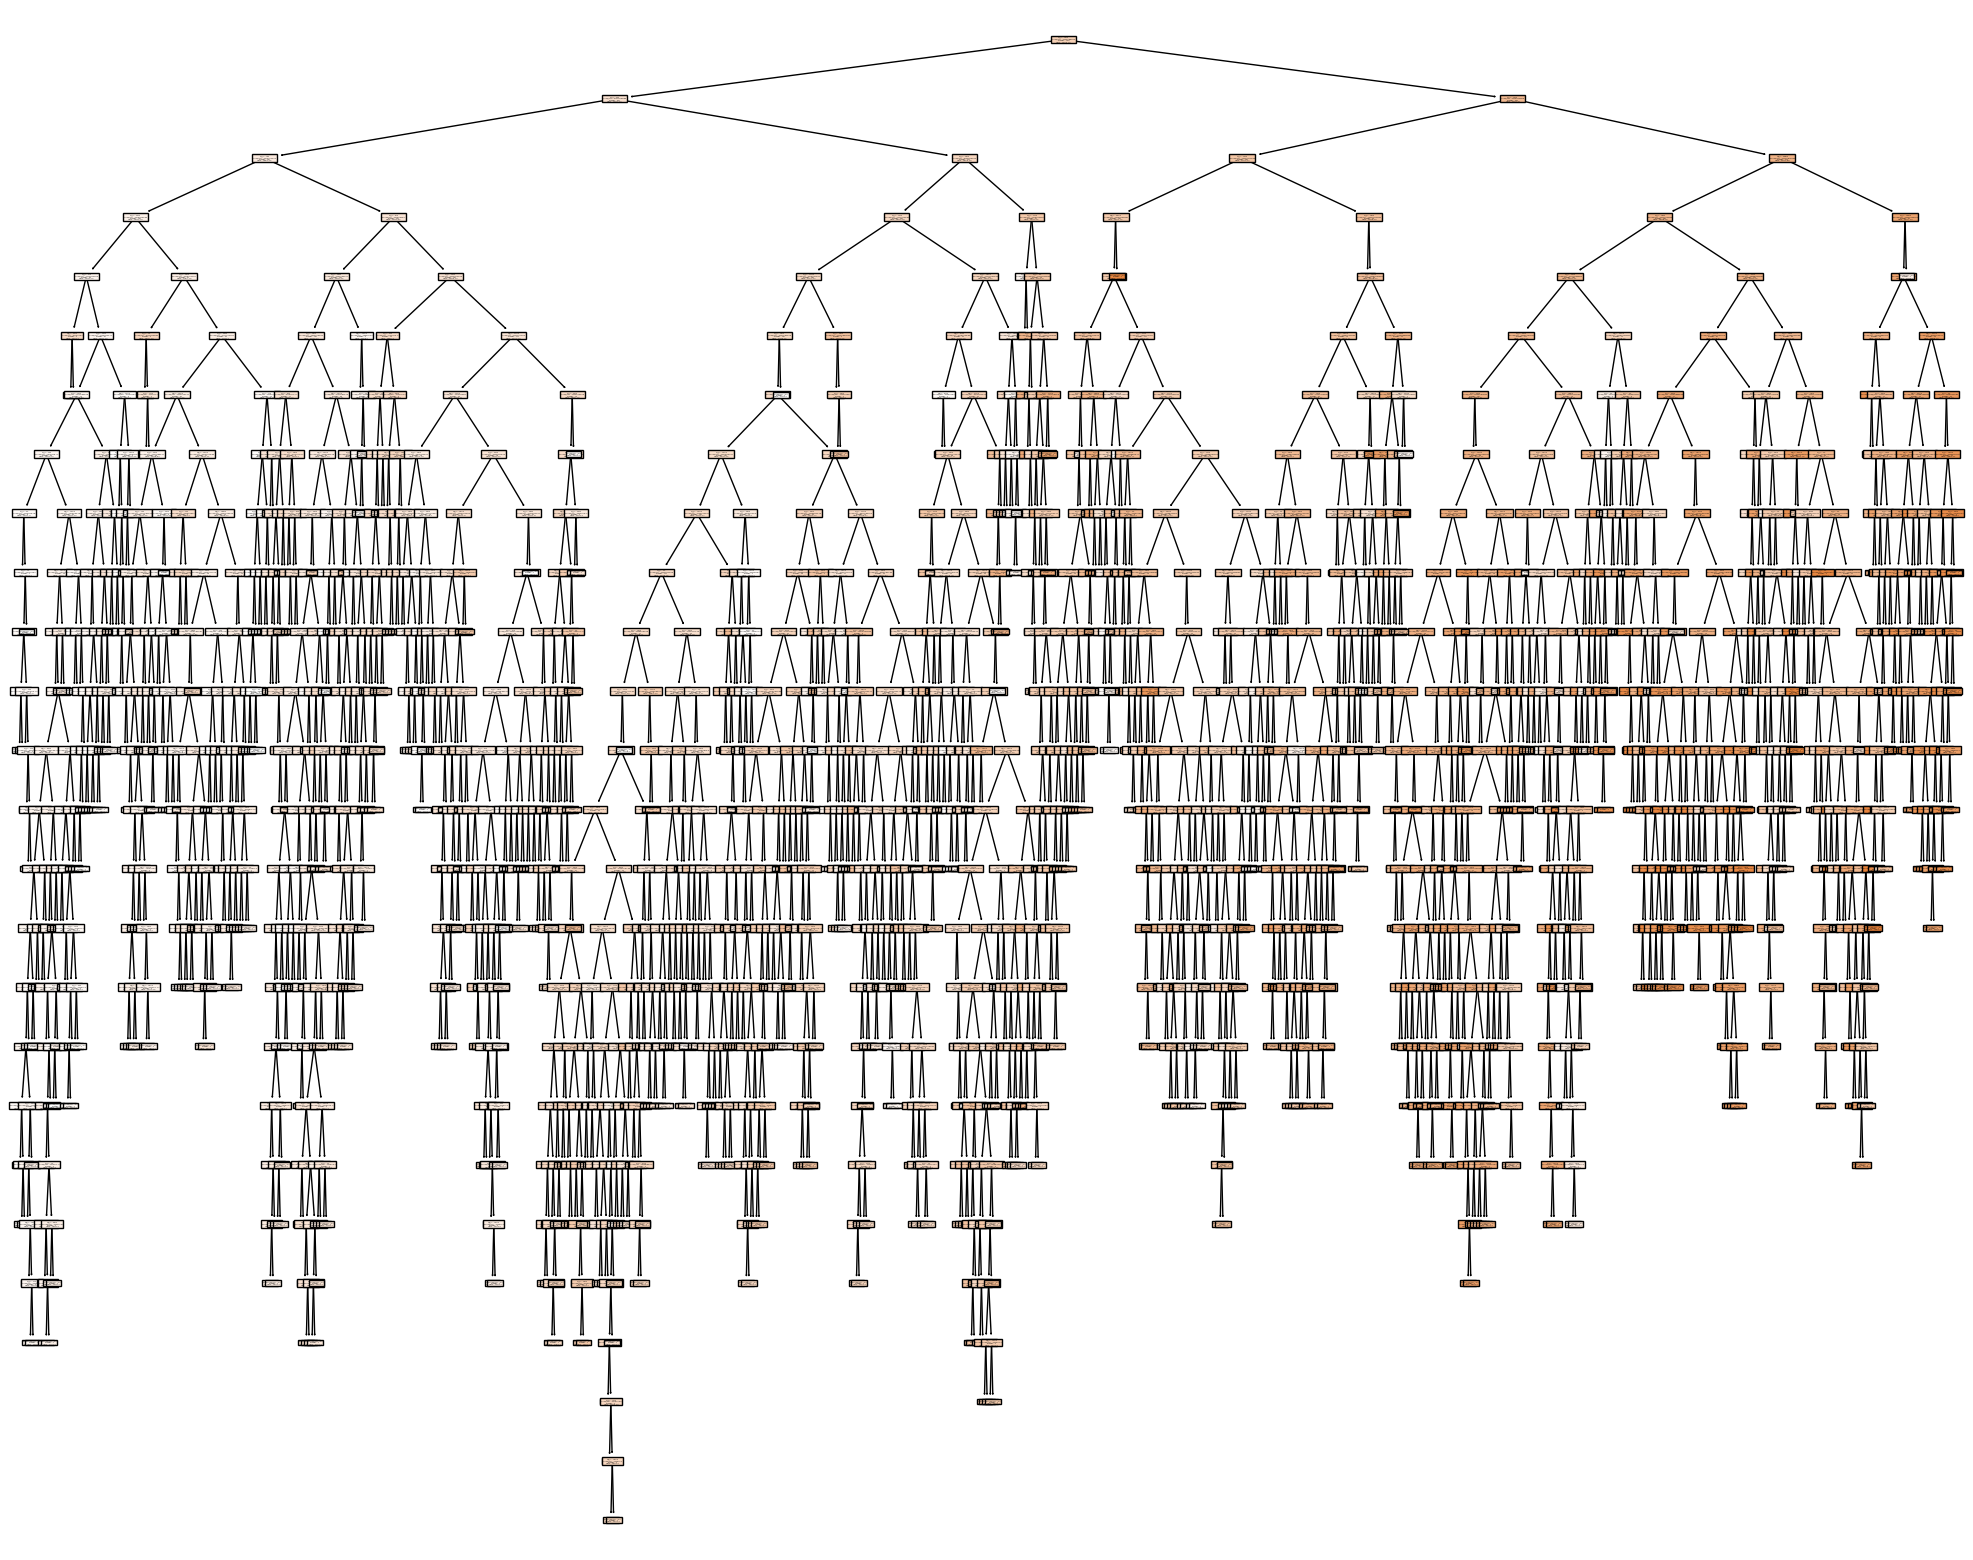

In [91]:
# plotting tree
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt, filled=True)
plt.show()

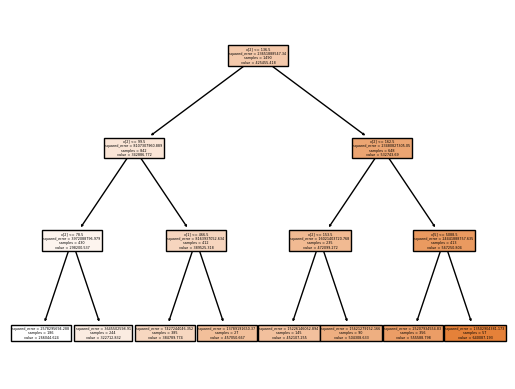

In [92]:
# Prune the tree using hyperparameters
dt = DecisionTreeRegressor(max_depth=3, min_samples_split=30).fit(xtrain,ytrain)
from sklearn import tree
tree.plot_tree(dt, filled=True);


In [93]:
ytrain_pred = dt.predict(xtrain)
dt_mae = mean_absolute_error(ytrain_pred, ytrain)
print('Train error is',dt_mae)

Train error is 82981.43185649699


In [94]:
# make predictions using the x_test values
ytest_pred = dt.predict(xtest)

# evaluate the model
test_mae = mean_absolute_error(ytest_pred, ytest)
test_mae

75068.41575061617

## Random Forest Model

In [95]:
# import Random Forest model from scikit learn
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200,criterion='absolute_error').fit(xtrain,ytrain)
ytrain_pred = rf.predict(xtrain)
rftrain_mae = mean_absolute_error(ytrain_pred, ytrain)
print('Train error RF model is',rftrain_mae)

Train error RF model is 33191.63228355705


In [96]:
# make predictions on the x_test values
ytest_pred = rf.predict(xtest)

# evaluate the model
rftest_mae = mean_absolute_error(ytest_pred, ytest)
rftest_mae

78737.17472520107

#### From the observations above, answers the following questions:

Q1. Which model gave the lowest error? - 1 point

Ans:The Decision Tree gave the lowest error value after the drop and Random forest providing the lowest error with all data in the frame.

Q2. Why was linear regression not a suitable choice for this data? - 1 point

Ans:There are more than 2 variables acting within the model therefor linear regression will not work.

Q3. Which are the top 5 important features in this dataset? - 1 point

Ans: The 5 most important features are Price, Property tax, Insurance, Beds and Baths.

## Saving the Model

## Pickle:

* The pickle module implements a fundamental, but powerful algorithm for serializing and de-serializing a Python object structure.

* The saving of data is called Serialization, while restoring the data is called Deserialization.

**Pickle** model provides the following functions:
* **`pickle.dump`** to serialize an object hierarchy, you simply use `dump()`.
* **`pickle.load`** to deserialize a data stream, you call the `loads()` function.

In [97]:
# import pickle to save model
import pickle

# Save the trained model on the drive
pickle.dump(lrmodel, open('RE_Model','wb'))

In [98]:
# Load the pickled model
RE_Model = pickle.load(open('RE_Model','rb'))

In [99]:
np.array(xtrain.loc[22])

array([ 22, 139,  42,   1,   1, 703,   0,   1])

In [100]:
ytrain[22]

240000

In [101]:
df

,Unnamed: 0,price,property_tax,insurance,beds,baths,sqft,property_type_Bunglow,property_type_Condo
0,0,295850,234,81,1,1,584,0,1
1,1,216500,169,51,1,1,612,0,1
2,2,279900,216,74,1,1,615,0,1
3,3,379900,265,92,1,1,618,0,1
4,4,340000,88,30,1,1,634,0,1
...,...,...,...,...,...,...,...,...,...
1858,1876,760000,881,249,5,5,7842,1,0
1859,1879,690000,1553,473,5,6,6501,1,0
1860,1880,600000,942,287,5,6,7064,1,0
1861,1881,759900,803,245,5,6,7500,1,0


In [102]:
# Use the loaded pickled model to make predictions
RE_Model.predict([[139,  42,   1,   1, 703,   0,   1,  0,   0,   6,   1,  0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: ignored